In [153]:
import numpy as np

In [154]:
X = np.random.random((3, 4, 4))

In [155]:
X_reshape = X.reshape((X.shape[0], -1))

In [156]:
X_sort = np.sort(X_reshape, axis=1)

In [168]:
import math
v_frac = [0.3, 0.2,0.3,0.2]
X_segs = np.zeros((X_reshape.shape))
if sum(v_frac)!=1.0:
    raise RuntimeError("Volume fractions do not add up to 1")
v_frac1 = 0.3
for i in range(1,len(v_frac)):
    v = sum(v_frac[0:i])
    print v
    length = X_sort.shape[1]
    ind = int(math.floor(v*length))
    seg = X_sort[:, ind-1]
    print seg
    X_seg = X_reshape >= seg[:, None]
    X_segs = X_segs+X_seg
    
#X_seg = X_seg1.astype(int)+X_seg2.astype(int)

0.3
[ 0.11802031  0.51234915  0.18613017]
0.5
[ 0.25428813  0.7046437   0.31473277]
0.8
[ 0.66595141  0.74683381  0.57860998]


In [162]:
X_segs

array([[ 2.,  0.,  1.,  2.,  1.,  3.,  2.,  0.,  0.,  3.,  1.,  1.,  3.,
         2.,  3.,  3.],
       [ 1.,  3.,  2.,  0.,  1.,  2.,  3.,  0.,  2.,  3.,  3.,  1.,  0.,
         1.,  2.,  3.],
       [ 3.,  3.,  3.,  0.,  2.,  1.,  1.,  2.,  2.,  3.,  3.,  1.,  0.,
         0.,  2.,  1.]])

In [152]:
X_seg

array([[False,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False,  True, False],
       [ True, False, False, ..., False, False, False]], dtype=bool)

In [116]:
import math
v_frac = 0.5
length = X_sort.shape[1]
ind = int(math.floor(v_frac*length))
ind

5000

In [117]:
seg = X_sort[:, ind-1]

In [121]:
#X_seg = np.zeros(shape = X_reshape.shape)

#for i in range(X.shape[0]):
#    X_seg[i,:] = X_reshape[i,:] >= seg[i]
#print X_seg
X_seg = X_reshape >= seg[:, None]


In [122]:
X_seg.astype(int)

array([[1, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [123]:
np.sum(X_seg, axis=1)/float(X_reshape.shape[1])

array([ 0.5001,  0.5001,  0.5001])

In [205]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from pymks.datasets import make_microstructure
n_samples, n_phases = 3, 3
size, grain_size = (5, 5), (1, 1)
v_frac = [0.2,0.2,0.2,0.2,0.2]
X = make_microstructure(n_samples=n_samples, size=size,n_phases=n_phases, grain_size=grain_size,seed=0, v_frac = v_frac)
X_reshape = X.reshape(n_samples, -1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(3, 5, 5)


In [206]:
X_reshape


array([[2, 2, 2, 1, 1, 2, 1, 4, 4, 0, 3, 1, 2, 4, 0, 0, 0, 3, 3, 4, 4, 3,
        1, 3, 0],
       [3, 0, 4, 2, 1, 1, 4, 2, 2, 0, 3, 2, 3, 4, 4, 1, 2, 4, 0, 3, 3, 0,
        0, 1, 1],
       [3, 2, 4, 0, 1, 1, 3, 2, 2, 1, 1, 0, 3, 0, 1, 2, 4, 0, 4, 0, 4, 2,
        4, 3, 3]])

In [207]:

np.sum(X_reshape, axis=1)/float(X.shape[1]*X.shape[2])

array([ 2.,  2.,  2.])

In [208]:
np.count_nonzero(X_reshape)/3

20

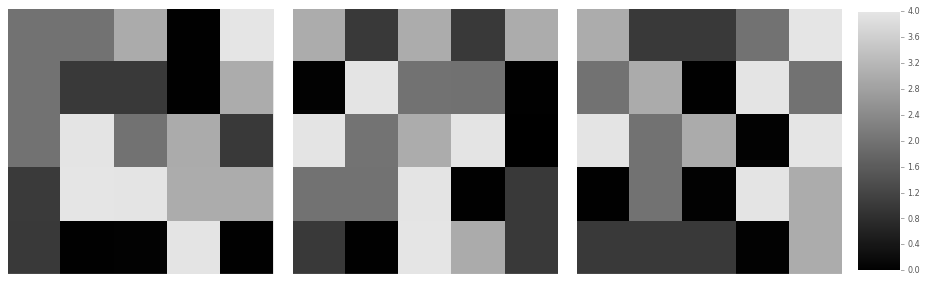

In [209]:
from pymks.tools import draw_microstructures
draw_microstructures(X)